In [85]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\salarydata.csv')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [5]:
data.shape

(32561, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Data Cleaning

### 1. Missing Values

In [7]:
 #check the missing value
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [8]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [9]:
#Handling missing values
# the code will replace the special character to nan  
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [10]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
#we will use the pandas DataFrame mode() method to fill the missing value.
data = data.fillna(data.mode().iloc[0])

In [12]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### 2. Remove duplicate data 

In [13]:
#Checking for duplicated entries
sum(data.duplicated(data.columns))

3591

In [14]:
#Delete the duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [15]:
data.shape

(28970, 14)

In [16]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

### 3. Handling Outliers

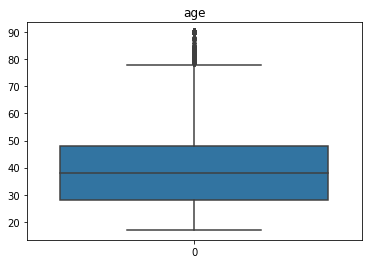

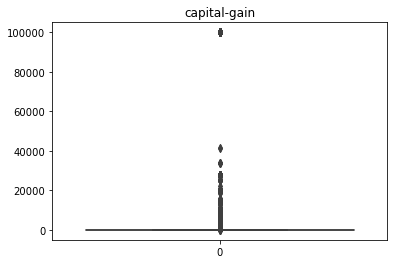

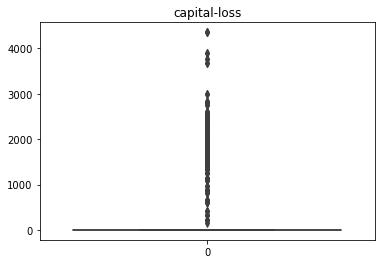

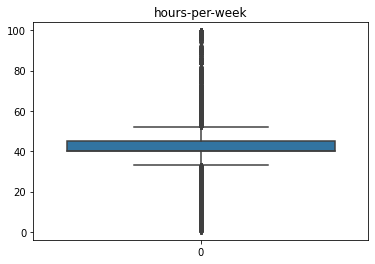

In [17]:
## checking outliers
for i in ['age',
       'capital-gain','capital-loss','hours-per-week'] :
    plt.title(i)
    sns.boxplot(data=data[i])
    plt.show()  


### Handling Outliers with age

In [18]:
q1 = np.percentile(data['age'],25,interpolation='midpoint')
q3 = np.percentile(data['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=data['age'][(data['age']<low_limit)|(data['age']>high_limit)].index
data.drop(index,inplace=True)

### Handling Outliers with capital_gain

In [19]:
q1 = np.percentile(data['hours-per-week'],25,interpolation='midpoint')
q3 = np.percentile(data['hours-per-week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=data['hours-per-week'][(data['hours-per-week']<low_limit)|(data['hours-per-week']>high_limit)].index
data.drop(index,inplace=True)

### 5. Exploratory Data analysis

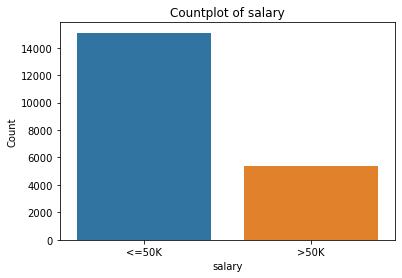

In [20]:
sns.countplot(x=data["salary"])
plt.title("Countplot of salary")
plt.xlabel("salary")
plt.ylabel("Count")
plt.show()

Most of the people got salary less than or equal to 50k

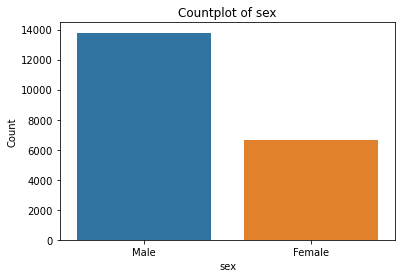

In [21]:
sns.countplot(x=data["sex"])
plt.title("Countplot of sex")
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()

In [22]:
data["sex"].value_counts(normalize=True)

Male      0.673832
Female    0.326168
Name: sex, dtype: float64

In this dataset male count is more than female. Arount 67% are males.Others are females.

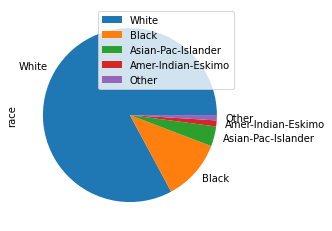

In [23]:
#Checking race

data['race'].value_counts().plot(kind = 'pie')
plt.legend()
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

Most of the are from white race

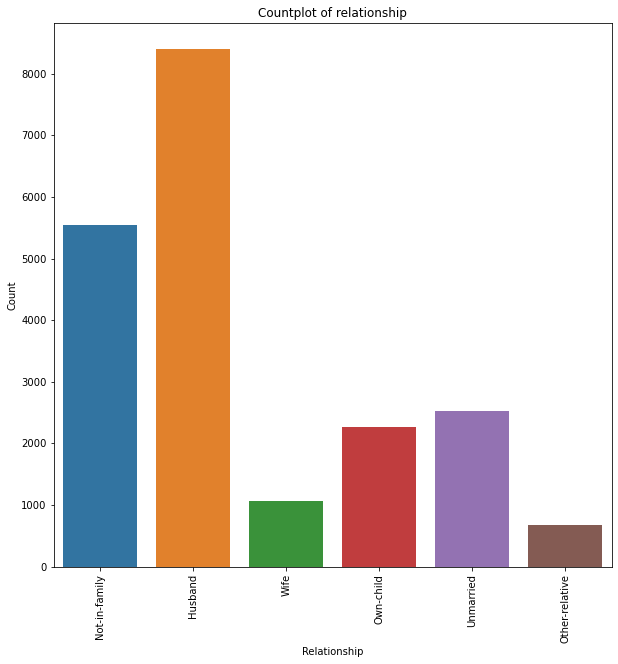

In [24]:
sns.countplot(x=data["relationship"])
plt.title("Countplot of relationship")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Above 12k people in this dataset having a relationship as husband.More than 8k people under the category of not-in-family.

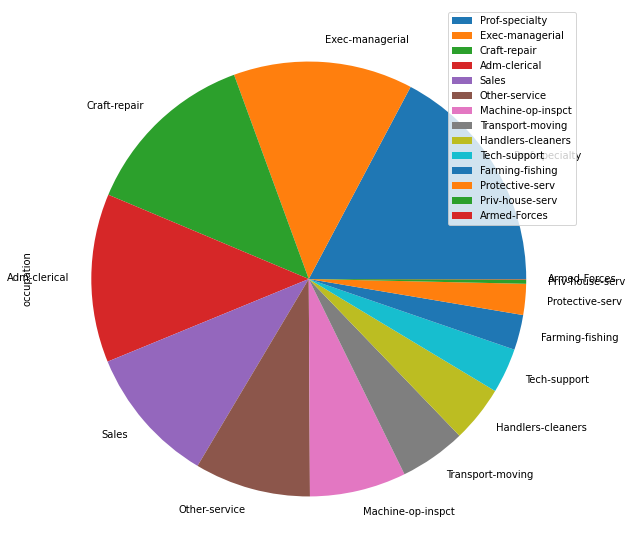

In [25]:
#Checking race

data['occupation'].value_counts().plot(kind = 'pie')
plt.legend()
plt.rcParams['figure.figsize'] = (15,10)
plt.show()

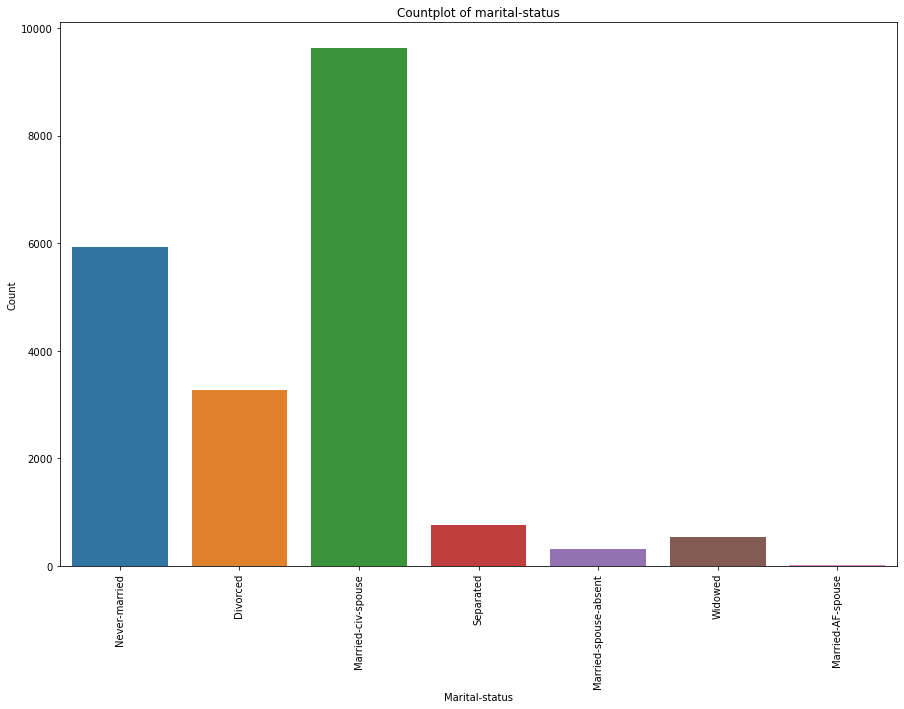

In [26]:
sns.countplot(x=data["marital-status"])
plt.title("Countplot of marital-status")
plt.xlabel("Marital-status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

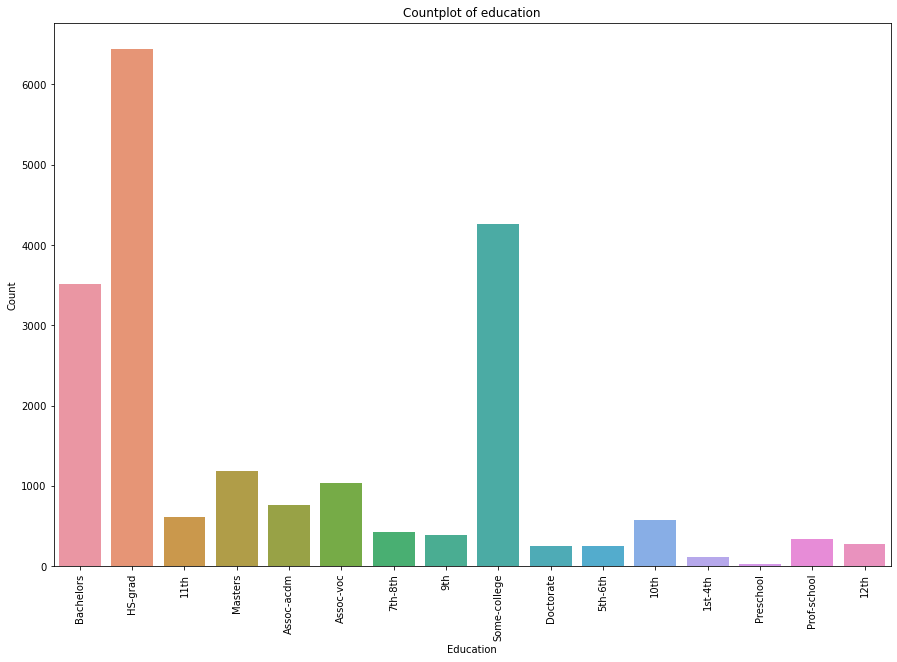

In [27]:
sns.countplot(x=data["education"])
plt.title("Countplot of education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

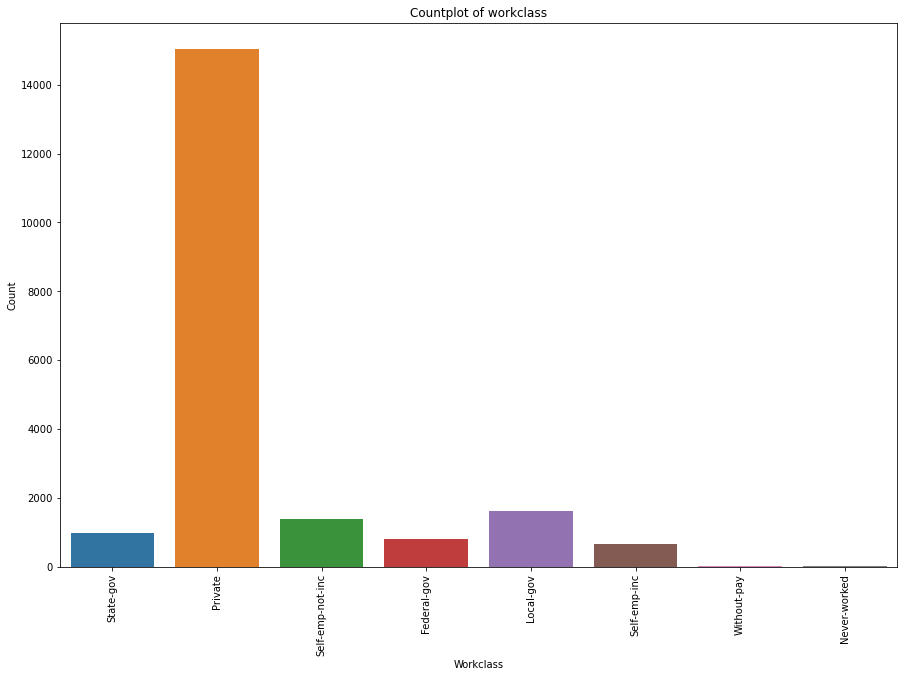

In [28]:
sns.countplot(x=data["workclass"])
plt.title("Countplot of workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

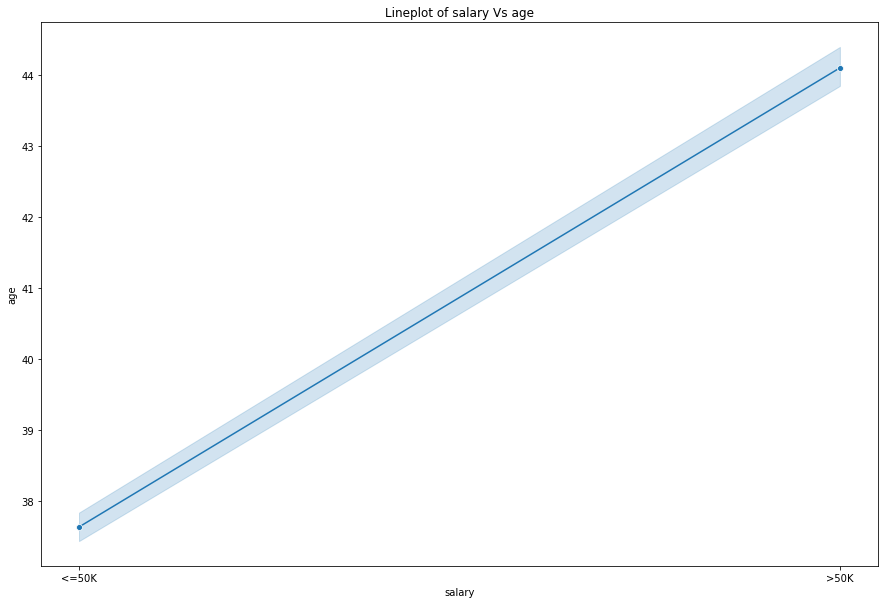

In [29]:
sns.lineplot(x=data['salary'],y=data['age'],marker='o')
plt.title('Lineplot of salary Vs age')
plt.show()

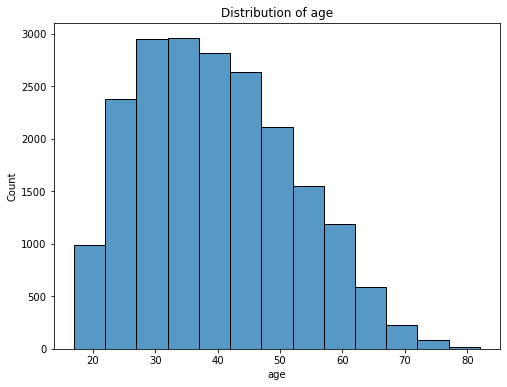

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(data["age"],binwidth=5)
plt.title("Distribution of age")
plt.show()

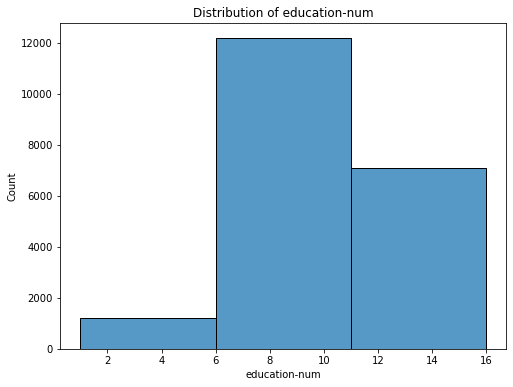

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data["education-num"],binwidth=5)
plt.title("Distribution of education-num")
plt.show()

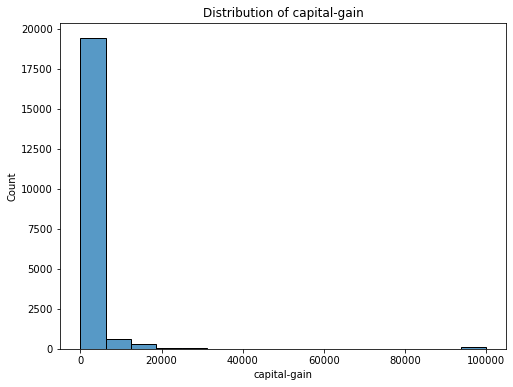

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(data["capital-gain"])
plt.title("Distribution of capital-gain")
plt.show()

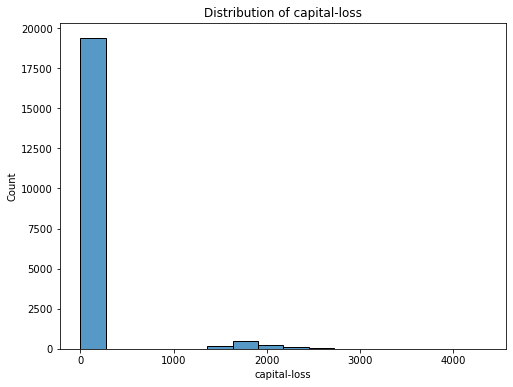

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data["capital-loss"])
plt.title("Distribution of capital-loss")
plt.show()

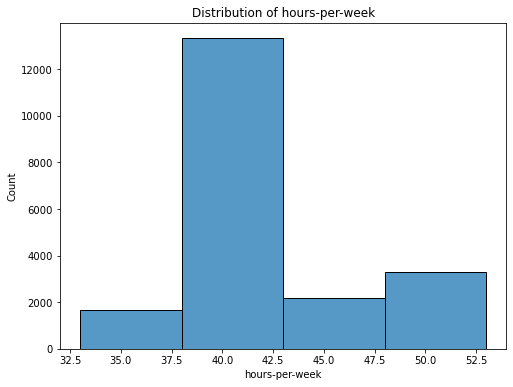

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(data["hours-per-week"],binwidth=5)
plt.title("Distribution of hours-per-week")
plt.show()

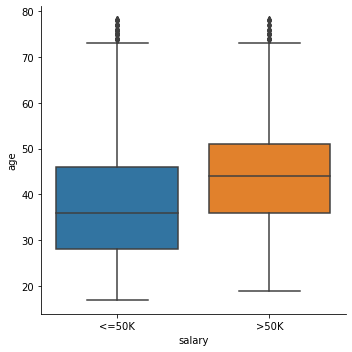

In [35]:
#Plotting Salary vs age
sns.catplot(x="salary", y= "age", kind="box", data=data)
plt.show()

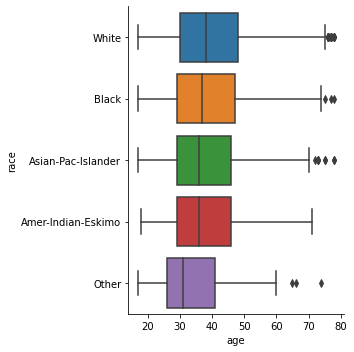

In [36]:
# Plotting Salary vs fnlwgt
sns.catplot(x="age", y= "race", kind="box", data=data)

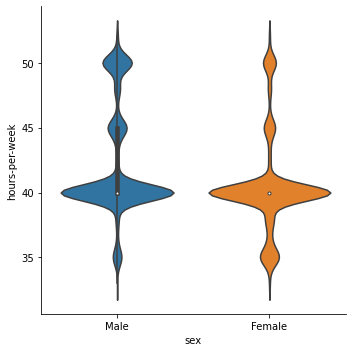

In [37]:
# Plotting Salary vs hours_per_week
sns.catplot(x="sex", y= "hours-per-week", kind="violin", data=data)

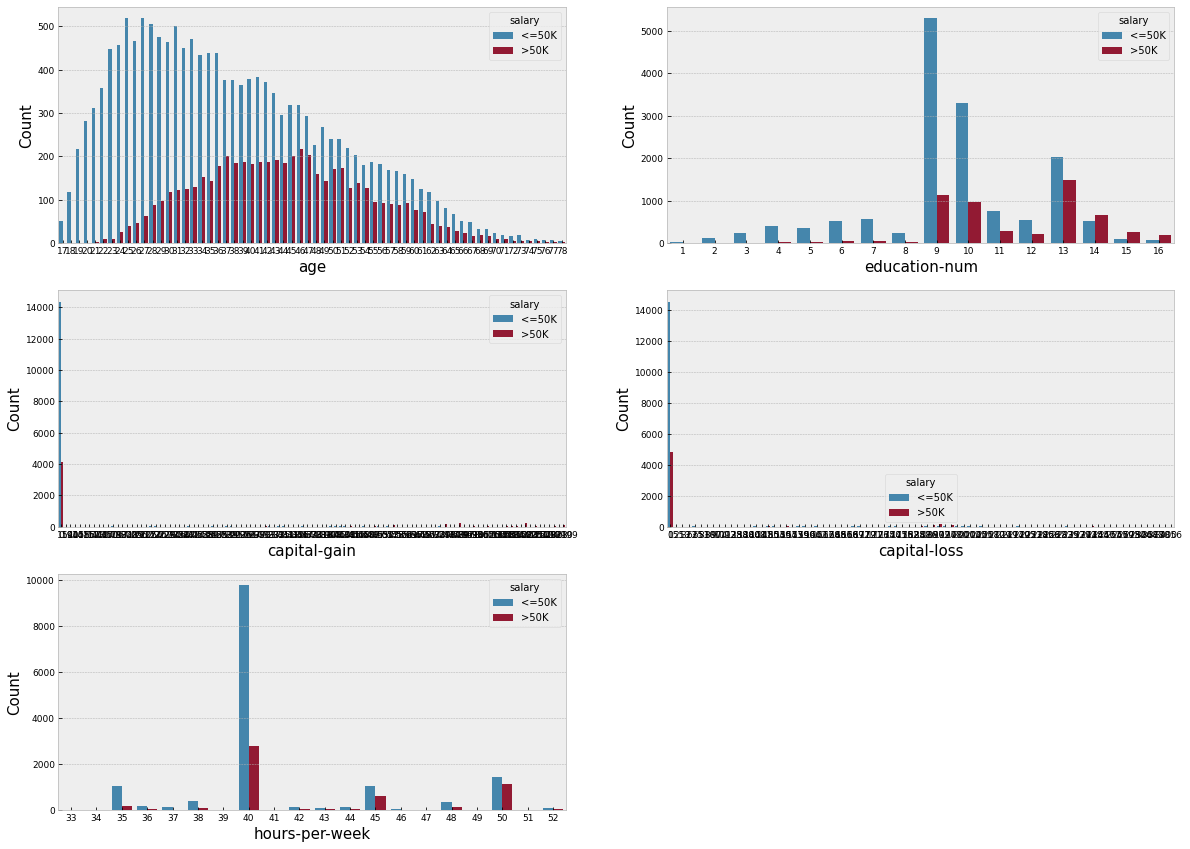

In [38]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(x):
    sns.countplot(x = x,hue= 'salary', data = data )
    #adding labels for x and y axis
    plt.xlabel(x, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(421)
graph('age')
plt.subplot(422)
graph('education-num')
plt.subplot(423)
graph('capital-gain')
plt.subplot(424)
graph('capital-loss')
plt.subplot(425)
graph('hours-per-week')


### 6. Feature Reduction 

- we can drop 'capital-gain'& 'capital-loss' both columns. 
- The column,education-num is the numerical version of the column education, so we also drop it.

In [39]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [40]:
data.shape

(20468, 11)

Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [41]:
data.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [42]:
data['marital-status'].value_counts()

married        9946
not married    7246
divorced       3276
Name: marital-status, dtype: int64

Before we do further analysis, we will separate the data as numeric and categorical so that our analysis becomes easy.

## 7. Feature Engineering

In [43]:
# education Category
data.education= data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
data.education = data.education.replace('HS-grad', 'high school')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
data.education = data.education.replace('Bachelors', 'undergrad')
data.education = data.education.replace('Masters', 'grad')
data.education = data.education.replace('Doctorate', 'doc')

In [44]:
# Salary
data.Salary = data.salary.replace('<=50K', 0)
data.Salary = data.salary.replace('>50K', 1)

In [45]:
data.corr()

,age,hours-per-week
age,1.000000,0.036539
hours-per-week,0.036539,1.000000


In [46]:
# Salary
data.Salary = data.Salary.replace( 0,'<=50K')
data.Salary = data.Salary.replace( 1,'>50K')

In [47]:
data['salary'].value_counts()

<=50K    15092
>50K      5376
Name: salary, dtype: int64

Dataset is unbalanced type

In [48]:
#Covert workclass Columns Datatype To Category Datatype
data['workclass'] = data['workclass'].astype('category')

### 8.Label Encoding

In [49]:
#apply label encoding
from sklearn.preprocessing import LabelEncoder
columns =["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]
label_encoder = LabelEncoder()
for i in columns:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,5,2,0,1,4,1,40,38,<=50K
2,38,3,2,0,5,1,4,1,40,38,<=50K
3,53,3,4,1,5,0,2,1,40,38,<=50K
4,28,3,5,1,9,5,2,0,40,4,<=50K
5,37,3,1,1,3,5,4,0,40,38,<=50K


In [50]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,5,2,0,1,4,1,40,38,<=50K
2,38,3,2,0,5,1,4,1,40,38,<=50K
3,53,3,4,1,5,0,2,1,40,38,<=50K
4,28,3,5,1,9,5,2,0,40,4,<=50K
5,37,3,1,1,3,5,4,0,40,38,<=50K


In [51]:
#Moved the salary column to another variable
target_salary = data.pop('salary')
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38


# Models

# 1.Logistic regression

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data, target_salary,test_size=0.2, random_state=42)

clf = LogisticRegression().fit(x_train,y_train)
clf

LogisticRegression()

In [53]:
clf.score(x_test,y_test)

0.73961895456766

In [54]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.76      0.95      0.84      3021
        >50K       0.51      0.15      0.24      1073

    accuracy                           0.74      4094
   macro avg       0.63      0.55      0.54      4094
weighted avg       0.69      0.74      0.68      4094



In [55]:
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,clf.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,clf.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,clf.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,clf.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.7396
Precision for Logistic Regression is 0.635
Recall for Logistic Regression is 0.5504
F1-Score for Logistic Regression is 0.5392


In [56]:
y_pred1 = clf.predict(x_test)

# 2. SVM

In [57]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.7372053255160621
Accuracy is: 0.7379091353199805
Precision is: 0.5445098919886812
Recall is: 0.7379091353199805
f1 score is: 0.6266264224319497
              precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85      3021
        >50K       0.00      0.00      0.00      1073

    accuracy                           0.74      4094
   macro avg       0.37      0.50      0.42      4094
weighted avg       0.54      0.74      0.63      4094

[[3021    0]
 [1073    0]]


# 3.kNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

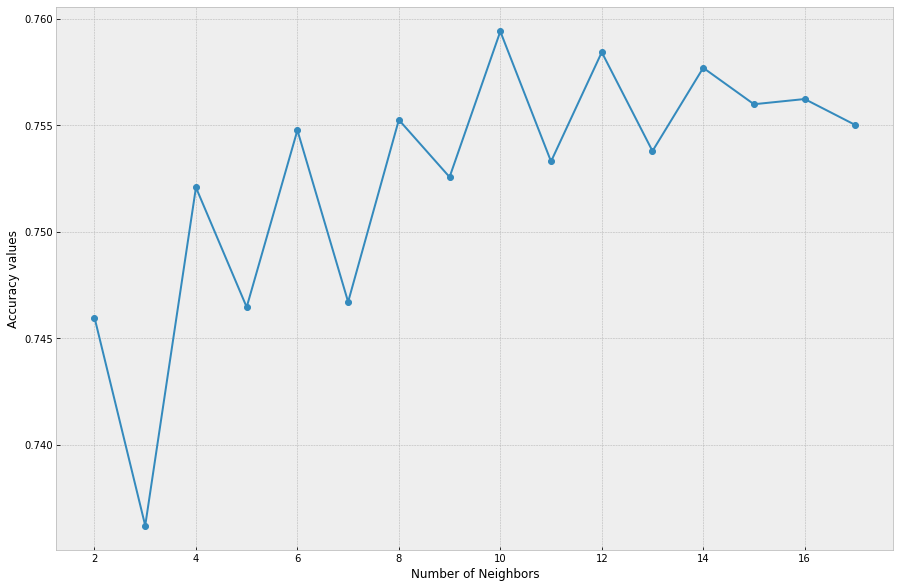

In [59]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [60]:
knn_model=KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.8056675216807133
Accuracy is: 0.7594040058622374
Precision is: 0.7360759202748519
Recall is: 0.7594040058622374
f1 score is: 0.7381571185558445
              precision    recall  f1-score   support

       <=50K       0.80      0.91      0.85      3021
        >50K       0.57      0.35      0.43      1073

    accuracy                           0.76      4094
   macro avg       0.68      0.63      0.64      4094
weighted avg       0.74      0.76      0.74      4094

[[2737  284]
 [ 701  372]]


# 4.Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7427943331704934
Precision is: 0.7375951234641024
Recall is: 0.7427943331704934
f1 score is: 0.7399740887964001
              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      3021
        >50K       0.51      0.48      0.49      1073

    accuracy                           0.74      4094
   macro avg       0.66      0.66      0.66      4094
weighted avg       0.74      0.74      0.74      4094

[[2529  492]
 [ 561  512]]


# 5.Random forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7804103566194431
Precision is: 0.7722779169431007
Recall is: 0.7804103566194431
f1 score is: 0.7753574607551019
              precision    recall  f1-score   support

       <=50K       0.84      0.87      0.85      3021
        >50K       0.59      0.52      0.55      1073

    accuracy                           0.78      4094
   macro avg       0.71      0.70      0.70      4094
weighted avg       0.77      0.78      0.78      4094

[[2640  381]
 [ 518  555]]


# 6.Gradient Boost

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.8229115779189057
Precision is: 0.815303298284436
Recall is: 0.8229115779189057
f1 score is: 0.816757586785598
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3021
        >50K       0.70      0.57      0.63      1073

    accuracy                           0.82      4094
   macro avg       0.78      0.74      0.76      4094
weighted avg       0.82      0.82      0.82      4094

[[2757  264]
 [ 461  612]]


# Naive bias

In [64]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7410845139228138
Precision is: 0.762952711513866
Recall is: 0.7410845139228138
f1 score is: 0.7491540193603919
              precision    recall  f1-score   support

       <=50K       0.85      0.78      0.82      3021
        >50K       0.50      0.63      0.56      1073

    accuracy                           0.74      4094
   macro avg       0.68      0.70      0.69      4094
weighted avg       0.76      0.74      0.75      4094

[[2363  658]
 [ 402  671]]


In [65]:
data1=data

In [66]:
data1

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,5,2,0,1,4,1,40,38
2,38,3,2,0,5,1,4,1,40,38
3,53,3,4,1,5,0,2,1,40,38
4,28,3,5,1,9,5,2,0,40,4
5,37,3,1,1,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32555,22,3,3,2,10,1,4,1,40,38
32556,27,3,3,1,12,5,4,0,38,38
32557,40,3,2,1,6,0,4,1,40,38
32558,58,3,2,2,0,4,4,0,40,38


# Standardisation

In [67]:
#since this is a binary classification we will use logistic reg

#normalizing data
scaler = StandardScaler()
data1 = scaler.fit_transform(data.values)

# Logistic Regression

In [68]:
x_train, x_test, y_train, y_test = train_test_split(data1, target_salary,test_size=0.2, random_state=42)

clf = LogisticRegression().fit(x_train,y_train)
clf

LogisticRegression()

In [69]:
clf.score(x_test,y_test)

0.7447484123106985

In [70]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.77      0.94      0.84      3021
        >50K       0.53      0.20      0.30      1073

    accuracy                           0.74      4094
   macro avg       0.65      0.57      0.57      4094
weighted avg       0.71      0.74      0.70      4094



In [71]:

print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,clf.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,clf.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,clf.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,clf.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.7447
Precision for Logistic Regression is 0.6512
Recall for Logistic Regression is 0.5704
F1-Score for Logistic Regression is 0.5697


In [72]:
y_pred1 = clf.predict(x_test)

### Support Vector Classifier

In [73]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.7372053255160621
Accuracy is: 0.7379091353199805
Precision is: 0.5445098919886812
Recall is: 0.7379091353199805
f1 score is: 0.6266264224319497
              precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85      3021
        >50K       0.00      0.00      0.00      1073

    accuracy                           0.74      4094
   macro avg       0.37      0.50      0.42      4094
weighted avg       0.54      0.74      0.63      4094

[[3021    0]
 [1073    0]]


### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7454811919882756
Precision is: 0.7398386262933426
Recall is: 0.7454811919882756
f1 score is: 0.7423897282056624
              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      3021
        >50K       0.52      0.48      0.50      1073

    accuracy                           0.75      4094
   macro avg       0.67      0.66      0.66      4094
weighted avg       0.74      0.75      0.74      4094

[[2538  483]
 [ 559  514]]


### KNN Model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

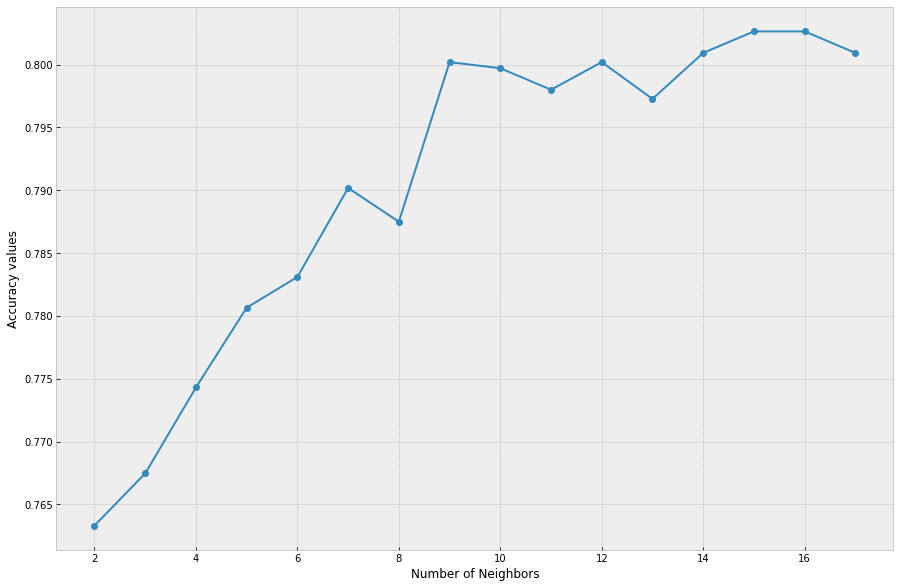

In [76]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [77]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.835287651154269
Accuracy is: 0.790180752320469
Precision is: 0.7816159762148495
Recall is: 0.790180752320469
f1 score is: 0.7845568125804867
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.62      0.53      0.57      1073

    accuracy                           0.79      4094
   macro avg       0.73      0.71      0.71      4094
weighted avg       0.78      0.79      0.78      4094

[[2670  351]
 [ 508  565]]


### Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7874938935026868
Precision is: 0.7790962399449175
Recall is: 0.7874938935026868
f1 score is: 0.7820829042345264
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      3021
        >50K       0.61      0.52      0.56      1073

    accuracy                           0.79      4094
   macro avg       0.72      0.70      0.71      4094
weighted avg       0.78      0.79      0.78      4094

[[2661  360]
 [ 510  563]]


# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.8229115779189057
Precision is: 0.815303298284436
Recall is: 0.8229115779189057
f1 score is: 0.816757586785598
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3021
        >50K       0.70      0.57      0.63      1073

    accuracy                           0.82      4094
   macro avg       0.78      0.74      0.76      4094
weighted avg       0.82      0.82      0.82      4094

[[2757  264]
 [ 461  612]]


### Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9601807743984365
Accuracy is: 0.7410845139228138
Precision is: 0.762952711513866
Recall is: 0.7410845139228138
f1 score is: 0.7491540193603919
              precision    recall  f1-score   support

       <=50K       0.85      0.78      0.82      3021
        >50K       0.50      0.63      0.56      1073

    accuracy                           0.74      4094
   macro avg       0.68      0.70      0.69      4094
weighted avg       0.76      0.74      0.75      4094

[[2363  658]
 [ 402  671]]


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8194919394235467

Models do not fit well when there is a class imbalance. So there are some methods like oversampling, undersampling and mixture.SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples.

## Sampling

In [82]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
from imblearn.over_sampling import SMOTE

In [86]:
oversample=SMOTE()
x,y=oversample.fit_resample(data,target_salary)
counter=Counter(y)
print(counter)

Counter({'<=50K': 15092, '>50K': 15092})


<BarContainer object of 2 artists>

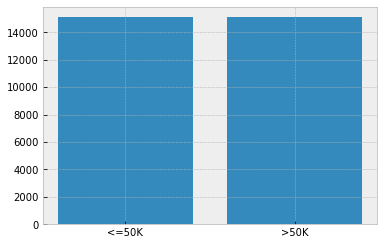

In [87]:
plt.bar(counter.keys(),counter.values())

In [88]:
#Standardisation
scale=StandardScaler()
X=scale.fit_transform(x)

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% training and 20% test

## Logistic Regression

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)


0.7074705979791287

## SVM

In [91]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7015364227440262
Accuracy is: 0.7132681795593838
Precision is: 0.72648027181611
Recall is: 0.7132681795593838
f1 score is: 0.7081549485996395
              precision    recall  f1-score   support

       <=50K       0.78      0.58      0.67      2974
        >50K       0.67      0.84      0.75      3063

    accuracy                           0.71      6037
   macro avg       0.73      0.71      0.71      6037
weighted avg       0.73      0.71      0.71      6037

[[1731 1243]
 [ 488 2575]]


### Decision Tree Classifier

In [92]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.7015364227440262
Accuracy is: 0.8002319032632103
Precision is: 0.8004214300644806
Recall is: 0.8002319032632103
f1 score is: 0.8001405464906642
              precision    recall  f1-score   support

       <=50K       0.81      0.78      0.79      2974
        >50K       0.79      0.82      0.81      3063

    accuracy                           0.80      6037
   macro avg       0.80      0.80      0.80      6037
weighted avg       0.80      0.80      0.80      6037

[[2325  649]
 [ 557 2506]]


## KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

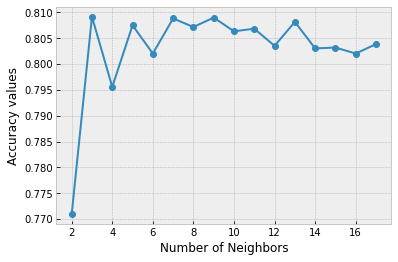

In [94]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [95]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.886031391063072
Accuracy is: 0.8091767434156037
Precision is: 0.8108612835944154
Recall is: 0.8091767434156037
f1 score is: 0.8087739848331541
              precision    recall  f1-score   support

       <=50K       0.83      0.77      0.80      2974
        >50K       0.79      0.85      0.82      3063

    accuracy                           0.81      6037
   macro avg       0.81      0.81      0.81      6037
weighted avg       0.81      0.81      0.81      6037

[[2280  694]
 [ 458 2605]]


## RANDOM FOREST

In [96]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.962189920072887
Accuracy is: 0.8409806195130032
Precision is: 0.8417958235937911
Recall is: 0.8409806195130032
f1 score is: 0.8408100547334416
              precision    recall  f1-score   support

       <=50K       0.86      0.81      0.83      2974
        >50K       0.83      0.87      0.85      3063

    accuracy                           0.84      6037
   macro avg       0.84      0.84      0.84      6037
weighted avg       0.84      0.84      0.84      6037

[[2415  559]
 [ 401 2662]]


## GRADIENT BOOSTING

In [97]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.962189920072887
Accuracy is: 0.8182872287560047
Precision is: 0.8203184564088616
Recall is: 0.8182872287560047
f1 score is: 0.8178544302545384
              precision    recall  f1-score   support

       <=50K       0.84      0.77      0.81      2974
        >50K       0.80      0.86      0.83      3063

    accuracy                           0.82      6037
   macro avg       0.82      0.82      0.82      6037
weighted avg       0.82      0.82      0.82      6037

[[2299  675]
 [ 422 2641]]


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8134835183037933

BEST MODEL IS RANDOM FOREST MODEL

In [99]:
# save the model
import pickle
filename = 'model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [100]:
load_model = pickle.load(open(filename,'rb'))

In [101]:
load_model.predict([[39,6,5,2,0,1,4,1,40,38]])

array(['<=50K'], dtype=object)